Date: 11 June 2019

Creating circles  to resemble QCD background and Z-jets. The background isproduced using exponential distribution and signal using normal distribution.
<img src="sig_bkg.png">

In [1]:
import random
import math
import numbers
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def make_circles(grid = 11, n_data = 10, n_particle = 10):
    max_distance = int((grid-1)/2)
    radii = np.random.randint(int(0.25*grid),max_distance,size = (n_data, 2))
    radii = radii.flatten()
    # adding distance using the gaussian and exponential distributions
    signal_d = np.random.normal(loc=10., scale=2.5, size=int(0.5*n_data))
    bkg_d = np.random.exponential(scale=5., size=n_data-int(0.5*n_data))
    distance = np.concatenate((signal_d, bkg_d), axis=0)
    distances = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in distance])
    radii1 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[::2]])
    radii2 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[1::2]])
    circle = np.zeros((n_data, grid, grid))
    circlex = np.zeros((grid, grid))
    circley = np.zeros((grid, grid))
    circlex[:][:][:] = np.arange(grid)
    circley[:][:][:] = np.transpose(circlex)
    x1 = circley - max_distance + distances/2
    x2 = circley - max_distance - distances/2
    y = circlex - max_distance
    position1 = np.sqrt(x1**2+y**2)
    position2 = np.sqrt(x2**2+y**2)
    fill1 = position1 <= radii1
    fill2 = position2 <= radii2
    signal_z1 = np.random.normal(loc=0.5, scale=0.05, size=int(0.5*n_data))
    bkg_z1 = np.random.exponential(scale=0.2, size=n_data-int(0.5*n_data))
    signal_z1 = np.where(signal_z1<1.0, signal_z1, 0)
    bkg_z1 = np.where(bkg_z1<1.0, bkg_z1, 0)
#     print('signal = ',signal_z1)
#     print('bkg = ',bkg_z1)
    z1 = np.concatenate((signal_z1, bkg_z1), axis =0)
    z2 = 1-z1
    z1 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in z1])
    z2 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in z2])
    p1 = np.exp((-1./2.)*(3.*position1/radii1)**2.)
    p2 = np.exp((-1./2.)*(3.*position2/radii2)**2.)
    p1 = np.multiply(np.exp((-1./2.)*(3.*position1/radii1)**2.),z1)
    p2 = np.multiply(np.exp((-1./2.)*(3.*position2/radii2)**2.),z2)
    mask1 = np.zeros(n_data*grid*grid)
    mask2 = np.zeros(n_data*grid*grid)
    for i in range(n_data):
        sub_mask1 = np.zeros(grid*grid)
        sub_mask1[0:n_particle] = 1
        np.random.shuffle(sub_mask1)
        mask1[0+i*grid**2:grid**2+i*grid**2] = sub_mask1
    mask1 = mask1.reshape(n_data, grid, grid)
    for i in range(n_data):
        sub_mask2 = np.zeros(grid*grid)
        sub_mask2[0:n_particle] = 1
        np.random.shuffle(sub_mask2)
        mask2[0+i*grid**2:grid**2+i*grid**2] = sub_mask2
    mask2 = mask2.reshape(n_data, grid, grid)
    p1 = np.where(fill1, p1, 0.0)*mask1
    p2 = np.where(fill2, p2, 0.0)*mask2
    circles = p1 + p2
    circles = circles.reshape(n_data, grid**2)
    radii = radii.reshape(n_data, 2)
    distances = distances.reshape(n_data*grid**2,1)[::grid**2]
    labels = np.concatenate((np.ones(int(0.5*n_data)), np.zeros(n_data-int(0.5*n_data))))
    labels = labels.reshape(n_data,1)
    return circles, radii, distances, labels

In [3]:
grid = 32
n_data = 10000
n_particle = 20
tic = time.perf_counter()
train_circleData, train_radiiLabels, train_distanceLabels, train_labels = make_circles(grid, n_data, n_particle)
toc = time.perf_counter()
test_circleData, test_radiiLabels, test_distanceLabels,test_labels = make_circles(grid, n_data, int(0.2*n_particle))
print(toc-tic)

3.254659986


In [4]:
np.savez('train_data', circles = train_circleData, radiilab = train_radiiLabels,
         distlab = train_distanceLabels, labels = train_labels)
np.savez('test_data', circles = test_circleData, radiilab = test_radiiLabels,
         distlab = test_distanceLabels, labels = test_labels)
data = np.load('train_data.npz')

radius = 
[12  8]
distance between centers = 
[8.29421044]


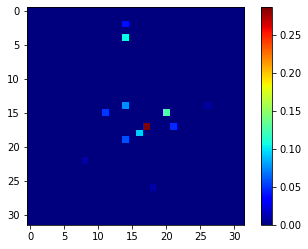

In [5]:
a = 99
circles = np.zeros_like(train_circleData[0])
for i in range(len(train_circleData)):
    circles += train_circleData[i]
display = train_circleData[a].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print("radius = ")
print(train_radiiLabels[a])
print("distance between centers = ")
print(train_distanceLabels[a])
plt.colorbar()

In [6]:
def shuffle_images( nx, ny, M, S ):
    images = np.random.randint( 0, 10, size=(M,nx,ny) )
    index = np.zeros( shape=(M,nx*ny) )
    index[:,0:3] = 1
    np.apply_along_axis(np.random.shuffle,1,index)
    index = np.reshape( index, newshape=(M,nx,ny) )

In [7]:
shuffle_images(3,3,5,3)